<a href="https://colab.research.google.com/github/fukuta-takenaka/pub_colab/blob/main/tutorial_pandas_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ref:
- https://tutorials.chainer.org/ja/11_Introduction_to_Pandas.html
- https://colab.research.google.com/drive/1a4sbKG7jOJGn4oeonQPA8XjJm7OYgcdX#scrollTo=nuHk1Tv9kOjf

## Pandas 入門

![dataset](https://raw.githubusercontent.com/fukuta-takenaka/pub_colab/main/data/California_Housing_Dataset.png)

Pandas はデータ操作によく用いられるパッケージであり、CSV などの一般的なデータ形式で保存されたデータの読み込みや、条件を指定しての一部データの抽出など、機械学習手法で取り扱うデータを整理するのに便利です。

まず Pandas パッケージを読み込みましょう。
`pandas` は `pd` という別名を与えて用いるのが一般的です。

In [ ]:
import pandas as pd

### CSV ファイルの読み書き

データセットは Google Colaboratory で用意されているサンプルデータ（カリフォルニアの家賃データ）を使用します。[データの概要](https://atmarkit.itmedia.co.jp/ait/articles/2201/31/news042.html)（カラム名が若干違います）

Pandas では CSV ファイルを読み込むための `pd.read_csv()` という関数が用意されています。
こちらを使って CSV ファイルを読み込みます。


In [ ]:
# データセットの読み込み。オンラインあるcsvの場合、URLを引数にしても読み込める
df = pd.read_csv('sample_data/california_housing_train.csv')

# 型の確認
type(df)

pandas.core.frame.DataFrame

`df` という変数名は、**データフレーム (data frame)** という Pandas で中心的に用いられる**データ構造 (data structure)** を表すクラスの名前の頭文字に由来しています。
`pd.read_csv()` 関数は、CSV ファイルの内容を `DataFrame` オブジェクトに読み込みます。
リストや辞書型から`DataFrame`オブジェクトを作ることも可能ですが、データ処理ではCSVファイルを読み込む場合の方が一般的です。[参考](https://www.w3resource.com/python-exercises/pandas/index.php#:~:text=pandas%20Series%20object-,Create%20Dataframe%3A,-import%20pandas%20as)

![dataframe](https://www.w3resource.com/w3r_images/pandas-data-structure.svg)

https://www.w3resource.com/python-exercises/pandas/index.php


### DataFrame の表示

`df` に読み込まれたデータの中身の確認してみましょう。
Jupyter Notebook 上では、大きな DataFrame を表示しようとすると自動的に一部が省略されることがあります。

先頭の数件のみを確認したい場合は、`df.head()`メソッドを利用します。`df.head()` はデフォルトで先頭から 5 件のデータを表示しますが、`df.head(3)` のように引数に表示したいデータ件数を指定すると、指定された件数だけを表示することもできます。

このデータでは、各行は地区を意味しており、地区ごとの緯度や経度、物件の築年数中央値、部屋数の合計（地区内の物件全ての部屋数なので非常に多い）などの情報が入っています。

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


### DataFrameの情報の確認：カラム名、インデックス、各列のデータ型、サイズ

データの理解や中身の抽出に頻繁に用いる、カラム名とインデックスなどを確認します

In [ ]:
print(df.columns)
print(type(df.columns))
print('')

print(df.index)
print(type(df.index))
print('')

print(df.dtypes)  # 各列のデータ型
print('')

print(df.shape)  # 行数、列数の順で出力

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>

RangeIndex(start=0, stop=17000, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

(17000, 9)


### データの抽出

| 操作 | 説明 |
| ---- |  ---- |
| `df[col]` | Returns column with label col as Series (colはラベル名の文字列) |
| `df[[col1, col2]]`	| Returns columns as a new DataFrame |
| `df.iloc[0, :]` | First row (pd.Series) |
| `df.iloc[:, 0]` | First column (pd.Series) |
| `df.iloc[0, 0]` | First element of first column |

`iloc`の操作では、表の座標のようにデータを取得するが、感覚としてはy座標、x座標の順で指定する点に注意。コロン`:`は、その軸すべてのアイテムを対象とする記号。`df.iloc[:, 0]`であれば「y軸について全て、x軸について最初のアイテム」 = 「最初の列」という意味になる。


これらの操作では、もともとの`df`は変更されません。抽出したデータを後で使いたい時は別の変数に格納する必要があります。


（発展：`df`の一部を抽出した`df_part`を考える。この時、どちらのDataFrameも同じ実体を参照しているため、`df_part`の中身の値を編集すると`df`の内容も変更されるため注意。さらに発展：実は必ずしも同じ参照となるとは限らず、`df_part`がコピーになる操作もある）

In [ ]:
print(df['longitude'])
print(type(df['longitude']))

0       -114.31
1       -114.47
2       -114.56
3       -114.57
4       -114.57
          ...  
16995   -124.26
16996   -124.27
16997   -124.30
16998   -124.30
16999   -124.35
Name: longitude, Length: 17000, dtype: float64
<class 'pandas.core.series.Series'>


In [ ]:
df[['latitude', 'housing_median_age']].head(3)

,latitude,housing_median_age
0,34.19,15.0
1,34.40,19.0
2,33.69,17.0


In [ ]:
print(df.iloc[2])  # indexはゼロスタートなので3行目を出力
print(type(df.iloc[2]))

longitude              -114.5600
latitude                 33.6900
housing_median_age       17.0000
total_rooms             720.0000
total_bedrooms          174.0000
population              333.0000
households              117.0000
median_income             1.6509
median_house_value    85700.0000
Name: 2, dtype: float64
<class 'pandas.core.series.Series'>


In [ ]:
print(df.iloc[2, 4])  # 3行目・5列目の値
print(type(df.iloc[2, 4]))

174.0
<class 'numpy.float64'>


### 計算

抽出したカラムなどは計算に利用できます

In [37]:
# 各地区（行）について、1世帯あたりの人口を計算
population_by_households = df['population'] / df['households']
print(population_by_households)

# DataFrame, Seriesにはmax()やmean()などのメソッドが用意されています
total_population = df['population'].sum()
print(total_population)

0        2.150424
1        2.438445
2        2.846154
3        2.278761
4        2.381679
           ...   
16995    2.457995
16996    2.567742
16997    2.728070
16998    2.715481
16999    2.985185
Length: 17000, dtype: float64
24302757.0


### 条件によるデータの検索

pandasの条件検索にはいくつか方法がありますが、可読性の観点から`df.query()`メソッドを扱います。  
Pythonの構文を文字列として与え、条件を満たす行が`DataFrame`で返却されます。  
条件の文では、カラム名をクォーテーションで囲む必要はありません。  

参考：https://qiita.com/dox/items/bf6ce1c71d8d18723e74


In [ ]:
df.query('housing_median_age == 1')  # 地区の築年数中央値が1年である行を検索。housing_median_ageはカラム名なのでクォーテーション不要

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10993,-120.93,37.65,1.0,2254.0,328.0,402.0,112.0,4.2500,189200.0
13708,-122.00,38.23,1.0,2062.0,343.0,872.0,268.0,5.2636,191300.0


In [ ]:
df.query('population / households < 1')  # 複雑な条件も設定できます：1世帯あたりの平均人数が1人未満の地区（？）を検索

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
8232,-118.44,34.04,16.0,18.0,6.0,3.0,4.0,0.5360,350000.0
11096,-121.00,39.75,8.0,1116.0,214.0,27.0,39.0,2.5893,83000.0
11112,-121.00,37.65,17.0,484.0,202.0,198.0,204.0,0.6825,187500.0


In [ ]:
mean_longitude = df['longitude'].mean()
mean_latitude = df['latitude'].mean()
print(mean_longitude)
print(mean_latitude)

# 変数を条件に利用するには@を変数名に付けます。and検索やor検索も可能です
north_east = df.query('(longitude > @mean_longitude) and (latitude > @mean_latitude)')
print(north_east[['longitude', 'latitude']].min())
north_east

-119.5621082352941
35.62522470588235
longitude   -119.56
latitude      35.63
dtype: float64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
157,-116.22,36.00,14.0,1372.0,386.0,436.0,213.0,1.1471,32900.0
568,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0
2591,-117.66,35.63,33.0,2579.0,564.0,1155.0,431.0,2.0441,42100.0
2638,-117.67,35.65,18.0,2737.0,589.0,1128.0,533.0,2.8000,72000.0
2639,-117.67,35.64,6.0,2115.0,342.0,927.0,337.0,6.1935,115700.0
...,...,...,...,...,...,...,...,...,...
9685,-119.56,36.10,29.0,424.0,78.0,284.0,73.0,1.5313,43800.0
9686,-119.56,36.10,25.0,1093.0,262.0,893.0,252.0,2.1300,50800.0
9687,-119.56,36.09,35.0,1648.0,285.0,792.0,265.0,3.2847,64700.0
9688,-119.56,36.09,14.0,1267.0,290.0,1077.0,279.0,1.8500,52300.0


文字列検索も可能です。[参考](https://note.nkmk.me/python-pandas-query/#:~:text=source%3A%20pandas_query.py-,%E6%96%87%E5%AD%97%E5%88%97%E3%83%A1%E3%82%BD%E3%83%83%E3%83%89%E3%81%A7%E6%9D%A1%E4%BB%B6%E6%8C%87%E5%AE%9A,-%E6%96%87%E5%AD%97%E5%88%97%E3%81%8C)

In [ ]:
kitanihon = pd.DataFrame(
    {'県名': ['北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県'],
     '面積': [83423, 9607, 15279, 7285, 11612, 9323, 13783]
     })
kitanihon

,県名,面積
0,北海道,83423
1,青森県,9607
2,岩手県,15279
3,宮城県,7285
4,秋田県,11612
5,山形県,9323
6,福島県,13783


In [ ]:
# 「道」の字が含まれている県名を検索。道はカラム名でないので、クォーテーションが必要。文字列を扱う際にはengine='python'引数が必要。
kitanihon.query('県名.str.contains("道")', engine='python')

,県名,面積
0,北海道,83423


### 並べ替え

データフレームのある列を抽出し、`df.sort_values()` メソッドを呼び出すことで値の**並べ替え (sort)** を行うことができます。
なお、このメソッドは並べ替えが終わったあとの値でもとのデータフレーム内の値を置き換えることまでは行わず、結果を返します。
そこで、別の変数で結果を受け取り、始めの 5 行を表示することで並べ替えが行われたことを確認してみましょう。

`df.sort_values()` は、デフォルトでは**昇順 (ascending)** に並べ替えを行います。昇順とは、だんだん値が大きくなっていくように並べ替えるときの並べ方のことで、逆にだんだん値が小さくなっていくように並べ替えるときは、**降順 (descending)** に並べると言います。

`df.sort_values()` は並べ替えを行いたい列の名前を `by` という引数で受け取ります。また、デフォルトでは昇順に並べ替えを行います。

In [ ]:
# total_rooms 列の値を昇順に並べ替え
df_as = df.sort_values(by='total_rooms')
df_as.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2990,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0
16309,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0
8188,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0
15369,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0
15656,-122.37,37.60,26.0,15.0,3.0,11.0,3.0,5.0480,350000.0


降順に並べ替える場合は、`ascending=False` という引数の指定を行います。

In [ ]:
# total_rooms の列の値を降順に並べ替え
df_de = df.sort_values(by='total_rooms', ascending=False)
df_de.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2871,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0
12772,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0
2969,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0
8881,-118.78,34.16,9.0,30405.0,4093.0,12873.0,3931.0,8.0137,399200.0
1116,-117.12,33.52,4.0,30401.0,4957.0,13251.0,4339.0,4.5841,212300.0


### CSV ファイルの保存

Pandas ではデータフレームオブジェクトの内容を CSV ファイルとして保存するための `df.to_csv()` というメソッドが用意されています。
  https://note.nkmk.me/python-pandas-to-csv/

In [ ]:
df.to_csv('sample.csv', index=False)

左のファイルマークのタブを開くとsample.csvが保存されていることが分かります。

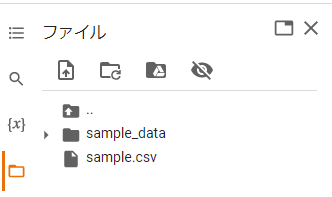

## HOME WORK

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('sample_data/california_housing_train.csv')
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


### 1: 1世帯あたりの部屋数が最も多い3地区を表示してください

計算結果の`Series`を新たなカラムとして`DataFrame`に追加できます  
`df['new_column'] = df['col1'] * df['col2']`

### 2: median_incomeとmedian_house_valueの関係を散布図`plt.scatter`を使って可視化

### 3: median_incomeとmedian_house_valueの相関係数を求める

`df.corr()`関数を使用して相関係数を算出しましょう。median_incomeとmedian_house_valueカラムを抽出し、新たなDataFrameを作成してから計算してください

### 4: 応用 median_incomeとmedian_house_valueの相関係数を求める2（[参考](https://sci-pursuit.com/math/statistics/correlation-coefficient.html#:~:text=%E3%82%88%E3%81%84%E3%81%A7%E3%81%97%E3%82%87%E3%81%86%E3%80%82-,%E7%9B%B8%E9%96%A2%E4%BF%82%E6%95%B0%E3%81%AE%E6%B1%82%E3%82%81%E6%96%B9,-%E3%81%9D%E3%82%8C%E3%81%9E%E3%82%8C%E3%81%AE%E5%A4%89%E6%95%B0)）

簡単に計算できる関数も用意されていますが、練習として手作業でも計算してみます


相関係数の求め方
- それぞれの変数の平均値を求める
- それぞれの変数の偏差（数値 － 平均値）を求める
- それぞれの変数の分散（偏差の二乗平均）を求める
- それぞれの変数の標準偏差（分散の正の平方根）を求める
- 共分散（偏差の積の平均）を求める
- 共分散を 2 つの変数の標準偏差で割って相関係数を得る


In [ ]:
# おまけ：トップの図の生成

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sc = ax.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], s=df['population']/100, alpha=0.2)
handles, labels = sc.legend_elements("sizes", num=3)
ax.legend(handles, ['100k', '200k', '300k'], title='population')
ax.set_aspect('equal', adjustable='box')
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
ax.set_title('California Housing Dataset')
fig.colorbar(sc, label='median_house_value')
plt.savefig('California_Housing_Dataset.png', dpi=200)
plt.show()

## Numpy入門

工事中...

In [ ]:
type(df)

pandas.core.frame.DataFrame

次に、`df` の `values` という属性の型を調べてみます。

In [ ]:
type(df.values)

numpy.ndarray

NumPy の ndarray になっています。
データフレームやシリーズは、`values` という属性に値を ndarray として格納しています。

In [ ]:
df.values

array([[-1.1431e+02,  3.4190e+01,  1.5000e+01, ...,  4.7200e+02,
         1.4936e+00,  6.6900e+04],
       [-1.1447e+02,  3.4400e+01,  1.9000e+01, ...,  4.6300e+02,
         1.8200e+00,  8.0100e+04],
       [-1.1456e+02,  3.3690e+01,  1.7000e+01, ...,  1.1700e+02,
         1.6509e+00,  8.5700e+04],
       ...,
       [-1.2430e+02,  4.1840e+01,  1.7000e+01, ...,  4.5600e+02,
         3.0313e+00,  1.0360e+05],
       [-1.2430e+02,  4.1800e+01,  1.9000e+01, ...,  4.7800e+02,
         1.9797e+00,  8.5800e+04],
       [-1.2435e+02,  4.0540e+01,  5.2000e+01, ...,  2.7000e+02,
         3.0147e+00,  9.4600e+04]])

In [ ]:
type(df['longitude'])

pandas.core.series.Series

In [ ]:
type(df['longitude'].values)

numpy.ndarray

逆に、Python のリストや ndarray からシリーズやデータフレームを作ることもできます。
NumPy で乱数を要素にもつ ndarray を生成し、これをデータフレームに変換してみましょう。

`pd.DataFrame` のインスタンス化の際に、`data` 引数に元にしたい ndarray を与えます。

In [ ]:
import numpy as np

# ndarray -> pd.DataFrame
df = pd.DataFrame(
    data=np.random.randn(10, 10)
)

df

,0,1,2,3,4,5,6,7,8,9
0,-0.763997,0.480735,-0.891013,0.411799,0.092613,-0.177087,0.073577,0.290848,-0.535851,0.137401
1,1.121627,-0.170700,-0.603625,-0.162108,0.886390,-0.517902,0.273133,1.067894,-2.407339,-0.807210
2,0.942662,1.230697,0.104118,0.128524,0.036715,-1.094129,-0.655227,-0.617961,0.981652,0.665838
3,-0.155757,-1.704750,-0.552919,-1.223955,1.334364,-0.105068,0.754801,0.720138,1.467270,0.282498
4,-0.545263,0.560158,0.534063,-1.035245,0.711256,0.285595,-0.789536,1.037596,-0.853289,-1.408507
5,-1.117276,1.188242,-0.326819,1.135892,-0.691542,-0.589105,-1.614864,-1.290451,-0.818178,0.761613
6,0.740340,-0.093862,-1.151279,0.583157,1.667547,0.406725,-0.694636,0.640526,0.498219,0.557161
7,-2.391973,-0.301927,-0.401118,1.731871,0.517127,2.014679,-1.004964,-0.273811,-0.858321,0.222321
8,0.571300,-0.146013,-0.447779,-1.150505,1.729682,1.732398,0.798119,0.518636,-0.733495,-1.792732
9,0.543878,-1.538839,1.008550,-0.691978,1.238084,-0.556811,-0.572927,-0.386467,-0.376613,1.053814
